In [7]:
from data_pipeline import *
from utils import *
import numpy as np
import seaborn as sns
import scipy.stats
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.stats.multitest import multipletests

In [8]:
expr, gene_symbols, sample_names = load_data()
nb_samples, nb_genes = expr.shape

Found 4297 genes in datafile
Found 1208 genes in CRP regulatory network
4297 genes not in gene subset. Selecting 1076 genes ...


# E. coli intensities histogram

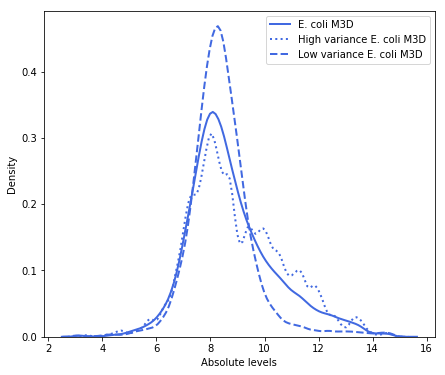

In [9]:
plt.figure(figsize=(7, 6))
plot_intensities(expr);

# E. coli gene ranges histogram

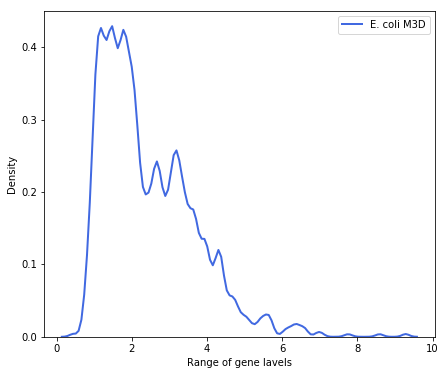

In [10]:
plt.figure(figsize=(7, 6))
plot_gene_ranges(expr);

# E. coli cluster map

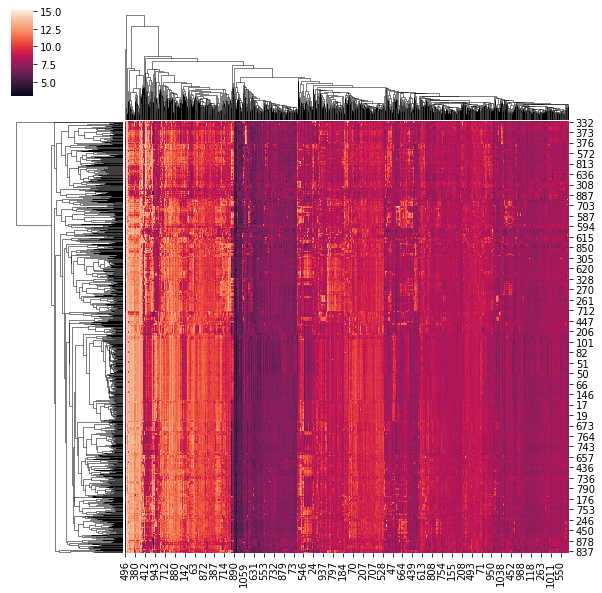

In [11]:
sns.clustermap(expr);

# E. coli TF-TG and TG-TG correlations

In [12]:
tf_tg_corr, tg_tg_corr = compute_tf_tg_corrs(expr, gene_symbols)
back_corr = correlations_list(expr, expr)

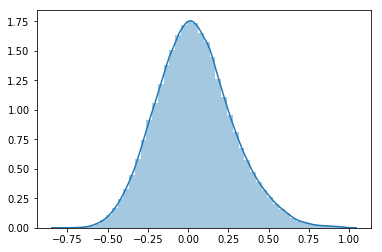

In [13]:
sns.distplot(back_corr);

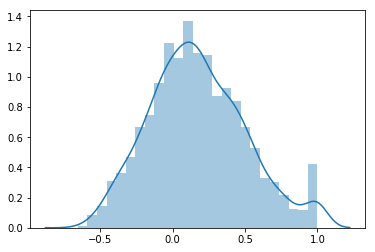

In [14]:
sns.distplot(tf_tg_corr);

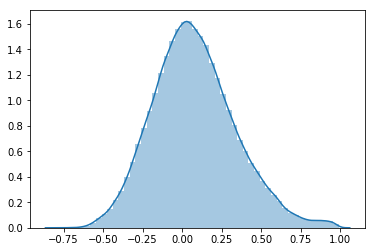

In [15]:
sns.distplot(tg_tg_corr);

# E. coli TF-TG histogram

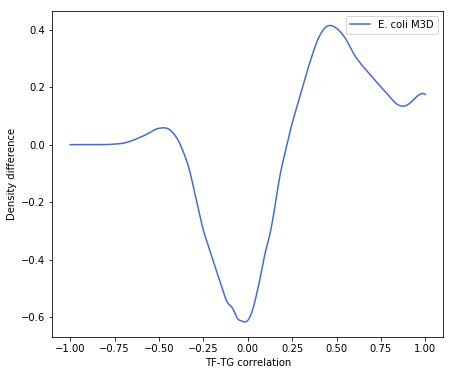

In [16]:
plt.figure(figsize=(7, 6))
plot_difference_histogram(tf_tg_corr, back_corr, 'TF-TG correlation');

# E. coli TG-TG histogram

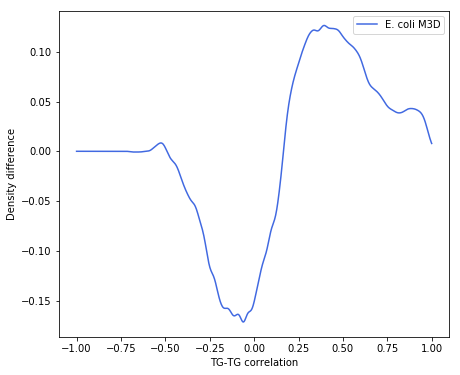

In [17]:
plt.figure(figsize=(7, 6))
plot_difference_histogram(tg_tg_corr, back_corr, 'TG-TG correlation');

# E. coli TF activity histogram

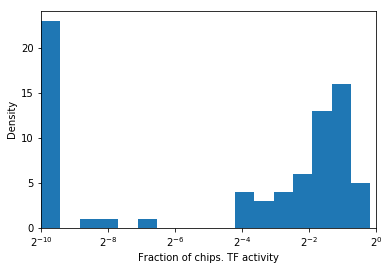

In [18]:
# CRP
plot_tf_activity_histogram(expr, gene_symbols)

# Cophenetic coefficients

In [19]:
# Split data into train and test sets
train_idxs, test_idxs = split_train_test(sample_names)
expr_train = expr[train_idxs, :]
expr_test = expr[test_idxs, :]

gamma_dx_dz, gamma_dx_tx, gamma_dz_tz, gamma_tx_tz = gamma_coefficients(expr_train, expr_test)
print('Gamma(D^X, D^Z): {}'.format(gamma_dx_dz))
print('Gamma(D^X, T^X): {}'.format(gamma_dx_tx))
print('Gamma(D^Z, T^Z): {}'.format(gamma_dz_tz))
print('Gamma(T^X, T^Z): {}'.format(gamma_tx_tz))

r_tf_tg_corr, r_tg_tg_corr = compute_tf_tg_corrs(expr_train, gene_symbols, flat=False)
s_tf_tg_corr, s_tg_tg_corr = compute_tf_tg_corrs(expr_test, gene_symbols, flat=False)
psi_dx_dz = psi_coefficient(r_tf_tg_corr, s_tf_tg_corr)
theta_dx_dz = theta_coefficient(r_tg_tg_corr, s_tg_tg_corr)
print('Psi(D^X, D^Z): {}'.format(psi_dx_dz))
print('Theta(D^X, D^Z): {}'.format(theta_dx_dz))

Gamma(D^X, D^Z): 0.9109078771438015
Gamma(D^X, T^X): 0.5308278489633552
Gamma(D^Z, T^Z): 0.5456429177501786
Gamma(T^X, T^Z): 0.5197255060786521
Psi(D^X, D^Z): 0.9143066268198939
Theta(D^X, D^Z): 0.9297821885778041
